In [1]:
import yfinance as yf

# Download Tesla stock data
tesla_data = yf.download('TSLA', start='2021-01-01', end='2022-01-01')

# Reset the index
tesla_data.reset_index(inplace=True)

# Save the data (optional)
tesla_data.to_csv('tesla_stock_data.csv', index=False)

# Display the first five rows
print(tesla_data.head())


[*********************100%***********************]  1 of 1 completed
                       Date        Open        High         Low       Close  \
0 2021-01-04 00:00:00-05:00  239.820007  248.163330  239.063339  243.256668   
1 2021-01-05 00:00:00-05:00  241.220001  246.946671  239.733337  245.036667   
2 2021-01-06 00:00:00-05:00  252.830002  258.000000  249.699997  251.993332   
3 2021-01-07 00:00:00-05:00  259.209991  272.329987  258.399994  272.013336   
4 2021-01-08 00:00:00-05:00  285.333344  294.829987  279.463318  293.339996   

    Adj Close     Volume  
0  243.256668  145914600  
1  245.036667   96735600  
2  251.993332  134100000  
3  272.013336  154496700  
4  293.339996  225166500  


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for Tesla revenue data
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla-inc/revenue'

# Send an HTTP request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the revenue table on the page
    revenue_table = soup.find('table', {'class': 'historical_data_table'})

    # Check if the revenue table is found
    if revenue_table:
        # Extract data from the table
        tesla_revenue = pd.read_html(str(revenue_table))[0]

        # Display the last five rows
        print("Last five rows of Tesla Revenue Data:")
        print(tesla_revenue.tail())
    else:
        print("Revenue table not found on the page.")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


Failed to retrieve the webpage. Status code: 403


In [7]:
# Define the stock symbol
gme_symbol = "GME"

# Use yfinance to get historical stock data
gme_data = yf.download(gme_symbol, start="2022-01-01", end="2022-12-31")

# Reset the index
gme_data.reset_index(inplace=True)

# Save the dataframe (optional, you can skip this step if you don't need to save it)
gme_data.to_csv("gme_stock_data.csv", index=False)

# Display the first five rows
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed
                       Date       Open       High        Low      Close  \
0 2022-01-03 00:00:00-05:00  37.307499  39.845001  37.302502  38.209999   
1 2022-01-04 00:00:00-05:00  38.042500  38.247501  35.762501  37.227501   
2 2022-01-05 00:00:00-05:00  37.097500  37.212502  32.287498  32.342499   
3 2022-01-06 00:00:00-05:00  33.209999  34.424999  30.285000  32.757500   
4 2022-01-07 00:00:00-05:00  39.942501  40.077499  33.125000  35.154999   

   Adj Close    Volume  
0  38.209999   5654800  
1  37.227501   7339600  
2  32.342499  13585600  
3  32.757500  24206000  
4  35.154999  48549200  


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to extract revenue data from the GME revenue URL
def extract_gme_revenue_data(url):
    # Set a User-Agent header to mimic a browser
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    # Send an HTTP request to the URL
    gme_response = requests.get(url, headers=headers)

    # Check if the request was successful
    if gme_response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(gme_response.text, 'html.parser')

        # Find the revenue table on the page
        revenue_table = soup.find('table', {'class': 'historical_data_table'})

        # Check if the table is found
        if revenue_table:
            # Extract data from the table
            gme_revenue = pd.read_html(str(revenue_table))[0]

            # Display the last five rows
            print(gme_revenue.tail())
        else:
            print("No revenue table found on the page.")
    else:
        print(f"Failed to retrieve the webpage for GME. Status code: {gme_response.status_code}")

# GME Revenue URL
gme_revenue_url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop-corp/revenue'

# Extract GME Revenue Data
extract_gme_revenue_data(gme_revenue_url)


Failed to retrieve the webpage for GME. Status code: 403


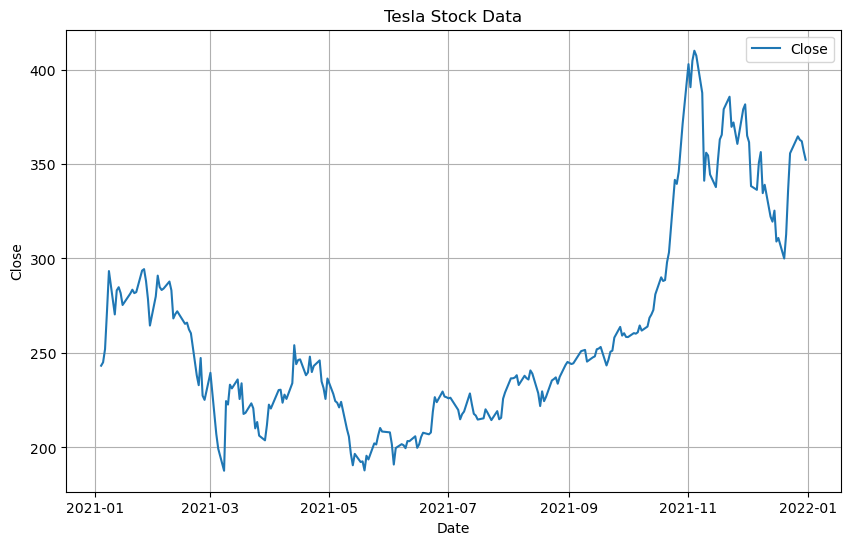

In [5]:
import matplotlib.pyplot as plt

def make_graph(data, title, x, y):
    plt.figure(figsize=(10, 6))
    plt.plot(data[x], data[y], label=y)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Tesla Stock Graph
make_graph(tesla_data, 'Tesla Stock Data', x='Date', y='Close')


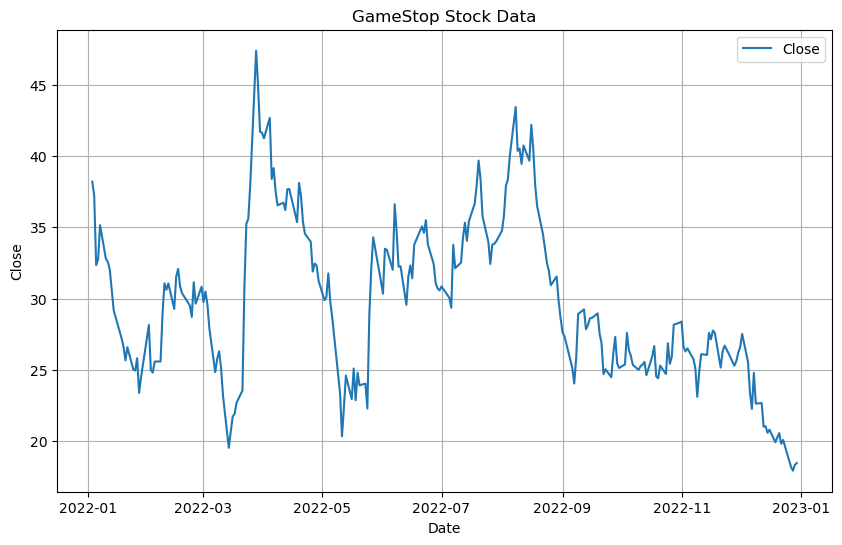

In [9]:
# Assuming gme_data is your DataFrame with GameStop stock data
make_graph(gme_data, 'GameStop Stock Data', x='Date', y='Close')
